# REVIEW CLASSIFICATION USING SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics




# DataSet Information

In [2]:
df=pd.read_csv(r"C:\Users\Aman Chauhan.DESKTOP-KFFGBP5\Documents\Python Scripts\Sentiment Analysis\data.csv")

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


**DATA TYPES**

In [4]:
df.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateSeen        object
reviews.didPurchase     object
reviews.doRecommend     object
reviews.id             float64
reviews.numHelpful     float64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
dtype: object

In [5]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [150]:
df.isnull().count()

id                     28332
dateAdded              28332
dateUpdated            28332
name                   28332
asins                  28332
brand                  28332
categories             28332
primaryCategories      28332
imageURLs              28332
keys                   28332
manufacturer           28332
manufacturerNumber     28332
reviews.date           28332
reviews.dateSeen       28332
reviews.didPurchase    28332
reviews.doRecommend    28332
reviews.id             28332
reviews.numHelpful     28332
reviews.rating         28332
reviews.sourceURLs     28332
reviews.text           28332
reviews.title          28332
reviews.username       28332
sourceURLs             28332
dtype: int64

In [6]:
df.shape
row=df.shape[0]
cols=df.shape[1]
print('Table Dimension:',df.shape)
print('-------------')
print('Total Rows:',row)
print('-------------')
print('Total Columns:',cols)
print('-------------')
print('columns:\n',df.columns.values)

Table Dimension: (28332, 24)
-------------
Total Rows: 28332
-------------
Total Columns: 24
-------------
columns:
 ['id' 'dateAdded' 'dateUpdated' 'name' 'asins' 'brand' 'categories'
 'primaryCategories' 'imageURLs' 'keys' 'manufacturer'
 'manufacturerNumber' 'reviews.date' 'reviews.dateSeen'
 'reviews.didPurchase' 'reviews.doRecommend' 'reviews.id'
 'reviews.numHelpful' 'reviews.rating' 'reviews.sourceURLs' 'reviews.text'
 'reviews.title' 'reviews.username' 'sourceURLs']


In [7]:
print("Data Overview\n")
print(df.info())

Data Overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  

# Data Preprocessing

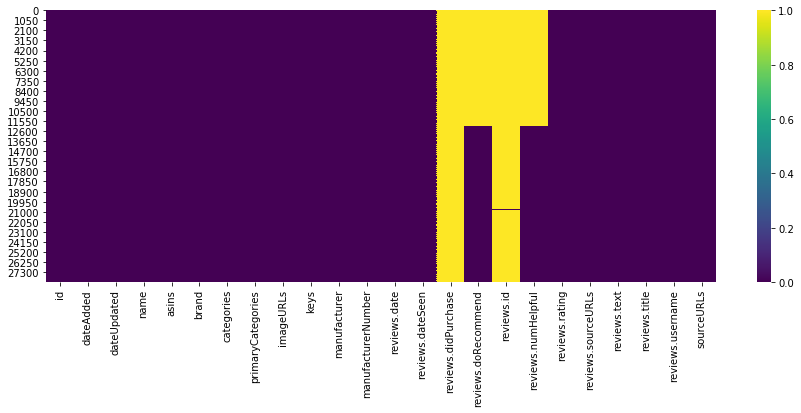

In [8]:
#It gives viualization that which column has more null values 
plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=True,cmap='viridis')

In [9]:
corr=df.corr()
print("Correlation Values:\n",corr)

Correlation Values:
                     reviews.id  reviews.numHelpful  reviews.rating
reviews.id            1.000000           -0.553529        0.074941
reviews.numHelpful   -0.553529            1.000000       -0.041006
reviews.rating        0.074941           -0.041006        1.000000


In [10]:
#Diffrence between actual columns and correlated columns
set1=set(df.columns)
set2=set(corr.columns)
print(set1.difference(set2))

{'manufacturer', 'sourceURLs', 'reviews.dateSeen', 'keys', 'reviews.date', 'reviews.didPurchase', 'reviews.username', 'manufacturerNumber', 'reviews.text', 'categories', 'asins', 'reviews.doRecommend', 'dateAdded', 'primaryCategories', 'reviews.title', 'brand', 'id', 'imageURLs', 'name', 'reviews.sourceURLs', 'dateUpdated'}


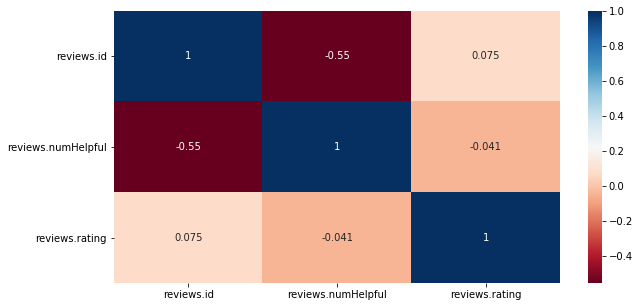

In [11]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="RdBu",annot=True)

In [12]:
#uses the Pandas method corr() to find the feature other than rating that is most correlated with rating.
df.corr()['reviews.rating'].sort_values()

reviews.numHelpful   -0.041006
reviews.id            0.074941
reviews.rating        1.000000
Name: reviews.rating, dtype: float64

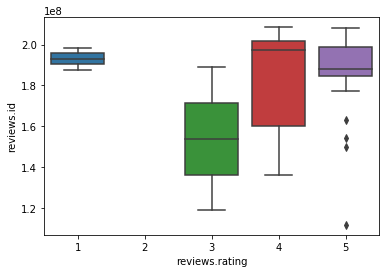

In [13]:
sns.boxplot(x='reviews.rating',y='reviews.id',data=df)

**NORMALIZATION** (Replaceing NaN value with mean value)

In [14]:
mean=df["reviews.rating"].mean()
print("\nMean of Rating Review:",mean)
df['reviews.rating'].replace(np.nan,mean,inplace=True)


Mean of Rating Review: 4.514047719892701


In [15]:
print("Null Values:",df['reviews.rating'].isnull().sum())

Null Values: 0


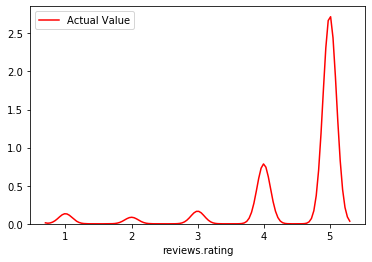

In [16]:
ax=sns.distplot(df['reviews.rating'],hist=False,color='r',label='Actual Value')

In [17]:
print('No. Of Unique Brands having Highest Rating:',df['name'][df['reviews.rating']==df['reviews.rating'].max()].nunique())
print('No. Of Unique Brands having Lowest Rating:',df['name'][df['reviews.rating']==df['reviews.rating'].min()].nunique())

No. Of Unique Brands having Highest Rating: 61
No. Of Unique Brands having Lowest Rating: 31


# Products having maximum Reviews

In [18]:
df[['name','brand']][df['reviews.text'] == df['reviews.text'].max()]

,name,brand
13768,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon
26121,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Amazon


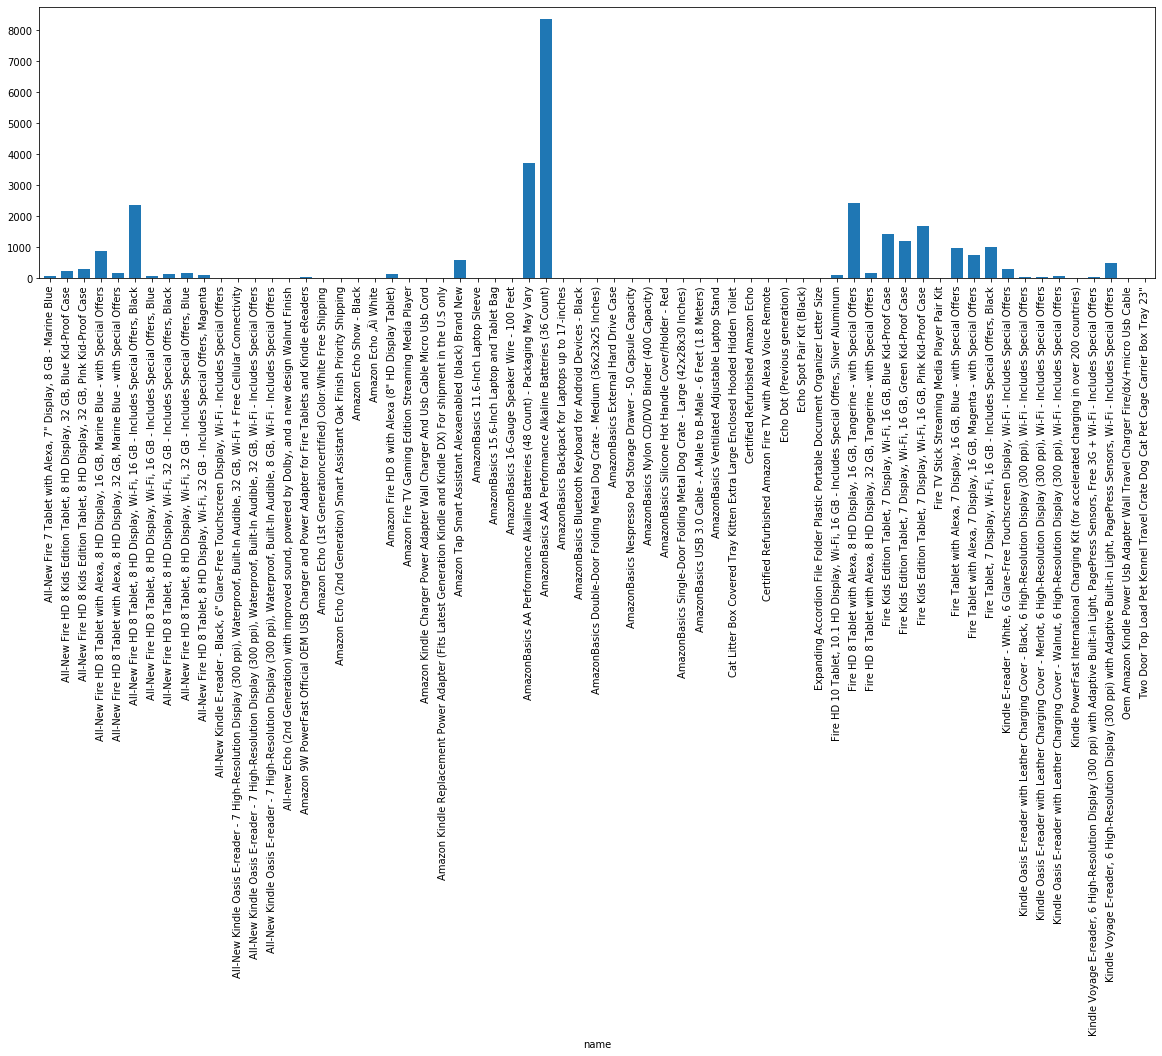

In [19]:
df1=df.groupby(by='name').count()
plt.subplots(figsize=(20,5))
df1['reviews.rating'].plot(kind='bar',width=0.7)

**ATTRIBUTES USED FOR SENTIMENT ANALYSIS**

In [20]:
data=df[['reviews.rating','reviews.text','reviews.title']]
print("Explore Filtered Data:")
data.head()

Explore Filtered Data:


,reviews.rating,reviews.text,reviews.title
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [21]:
data.rename(columns={'reviews.rating':'reviews_rating'},inplace=True)

C:\Users\Aman Chauhan.DESKTOP-KFFGBP5\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
data.head()

,reviews_rating,reviews.text,reviews.title
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [23]:
print("Explore Descriptive Statistics")
data.info()

Explore Descriptive Statistics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  28332 non-null  int64 
 1   reviews.text    28332 non-null  object
 2   reviews.title   28332 non-null  object
dtypes: int64(1), object(2)
memory usage: 664.2+ KB


In [24]:
#Dimension Information
data.shape

(28332, 3)

In [25]:
#Data Statistics Description
data.describe()

,reviews_rating
count,28332.000000
mean,4.514048
std,0.934957
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [26]:
data["reviews_rating"].value_counts().to_frame()

,reviews_rating
5,19897
4,5648
3,1206
1,965
2,616


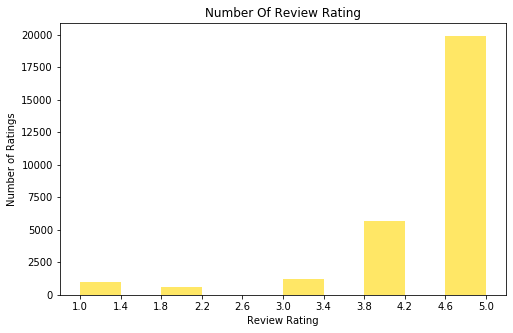

In [27]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data['reviews_rating'])

data['reviews_rating'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges,color='gold',alpha=0.6)

plt.title('Number Of Review Rating') # add a title to the histogram
plt.ylabel('Number of Ratings') # add y-label
plt.xlabel('Review Rating') # add x-label

plt.show()

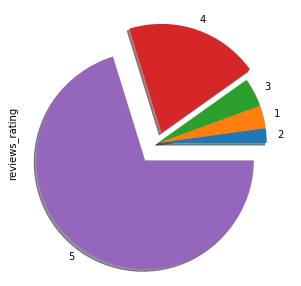

In [28]:
plt.subplots(figsize=(10,5))
data['reviews_rating'].value_counts().sort_values().plot.pie(explode=(0,0,0,0.1,0.2),shadow=True)

In [31]:
rating=data.groupby('reviews_rating',axis=0).sum()
rating

,reviews.text,reviews.title
reviews_rating,,
1,I don't know if I would buy thus brand again s...,... know if I would buy thus brand again seems...
2,In my opinion these did not last anywhere near...,... last anywhere near as long as Duracel in t...
3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...


In [31]:
data.head()

,reviews_rating,reviews.text,reviews.title
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aman
[nltk_data]     Chauhan.DESKTOP-KFFGBP5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

C:\Users\Aman Chauhan.DESKTOP-KFFGBP5\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


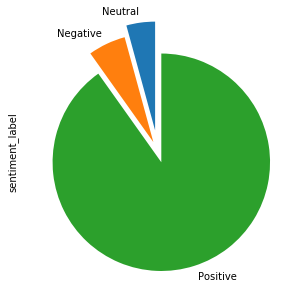

In [30]:
def sentiment_labeler(score):
    if(score==5 or score==4):
        return "Positive"
    elif (score==3):
        return "Neutral"
    else:
        return "Negative"

plt.subplots(figsize=(10,5))
data["sentiment_label"]=data["reviews_rating"].apply(sentiment_labeler)
data["sentiment_label"].value_counts().sort_values().plot.pie(explode=(0.2,0.1,0.1),startangle=90)

In [31]:
data.head()

,reviews_rating,reviews.text,reviews.title,sentiment_label
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Neutral
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,Positive
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,Positive
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Positive
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Positive


In [32]:
stopset=set(stopwords.words('english'))
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [33]:
y=data['reviews_rating']

In [34]:
x=vectorizer.fit_transform(df['reviews.text'])

In [35]:
print(y.shape)
print(x.shape)

(28332,)
(28332, 10252)


# Train and Test Of the Model

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# 1.Naive Bayes

In [37]:
from sklearn import naive_bayes

In [38]:
clf=naive_bayes.MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
y_pred=clf.predict(x_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7158990647608964


In [61]:
review=np.array(['WORST PRODUCT'])
review_vector=vectorizer.transform(review)
print(clf.predict(review_vector))


[5]


# 2.Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
model=SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred=model.predict(x_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8277748367743074


In [62]:
review=np.array(['poor product'])
review_vector=vectorizer.transform(review)
print(model.predict(review_vector))

[1]


# 3. KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
abc=KNeighborsClassifier()
abc.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred=abc.predict(x_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7241926945473796


In [63]:
review=np.array(['poor product'])
review_vector=vectorizer.transform(review)
print(abc.predict(review_vector))

[5]


# Summary
As in comparing three algorithms i.e. Naive Bayes,Support Vector Machine,KNN. The Support vector machine performs the best among three algorithm to pedict the product rating. The KNN and Naive Bayes gives high rating because the dataset is overfit.